In [35]:
# Import required dependencies
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from torchvision.transforms import ToTensor
import torch.nn.functional as F

import torch                                       #Pytorch pkg & tensor library
import torchvision                                 
import torchvision.transforms as transforms

import itertools as itertools

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Data Preprocessing and preperation

In [36]:
# Play a particular audio file in notebook
import IPython.display as ipd
ipd.Audio("../input/tools-sound/train/chainsaw/jg-032316-sfx-table-saw-1 (mp3cut.net) (1).wav")

Sampling rate:  22050
Shape of array: (128, 49)


/opt/conda/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


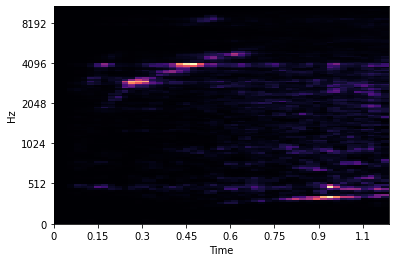

In [37]:
# Convert the sound to numpy array
y, sr= librosa.load("../input/tools-sound/train/chainsaw/jg-032316-sfx-table-saw-1 (mp3cut.net) (1).wav")
ps= librosa.feature.melspectrogram(y= y, sr= sr)

print("Sampling rate: ", sr)
print("Shape of array: "+str(ps.shape))

librosa.display.specshow(ps, y_axis= 'mel', x_axis= 'time')

/opt/conda/lib/python3.7/site-packages/librosa/util/utils.py:200: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  "on a non-contiguous input. This will result in a copy.".format(axis)


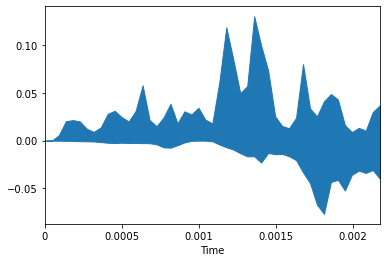

In [38]:
librosa.display.waveplot(ps, sr= sr)

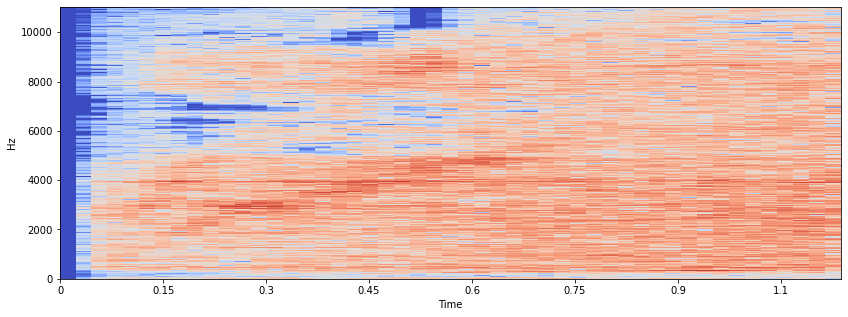

In [39]:
# Spectrum
X= librosa.stft(y)
Xdb= librosa.amplitude_to_db(abs(X))
plt.figure(figsize= (14, 5))
librosa.display.specshow(Xdb, sr= sr, x_axis= 'time', y_axis= 'hz')

In [40]:
def get_melspectrogram_db(file_path, sr=None, n_fft=2048, hop_length=512, n_mels=128, fmin=20, fmax=8300, top_db=80):
    wav,sr = librosa.load(file_path,sr=sr)
    if wav.shape[0]<5*sr:
        wav=np.pad(wav,int(np.ceil((5*sr-wav.shape[0])/2)),mode='reflect')
    else:
        wav=wav[:5*sr]
    spec=librosa.feature.melspectrogram(wav, sr=sr, n_fft=n_fft,
              hop_length=hop_length,n_mels=n_mels,fmin=fmin,fmax=fmax)
    spec_db=librosa.power_to_db(spec,top_db=top_db)
    return spec_db

In [41]:
Xdb= get_melspectrogram_db("../input/tools-sound/train/drill/compressed-air-drill-crushing-asphalt_fkXuyrNu (mp3cut.net) (11).wav")

In [42]:
def spec_to_image(spec, eps=1e-6):
    mean = spec.mean()
    std = spec.std()
    spec_norm = (spec - mean) / (std + eps)
    spec_min, spec_max = spec_norm.min(), spec_norm.max()
    spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
    spec_scaled = spec_scaled.astype(np.uint8)
    Tx= ToTensor()(spec_scaled)
    out = F.interpolate(Tx, size=128)  #The resize operation on tensor.
    return out



In [43]:
# Tx= ToTensor()(spec_to_image(Xdb))
# out = F.interpolate(Tx, size=128)  #The resize operation on tensor.
# out= np.array(out, dtype = 'float32')

In [44]:
out= spec_to_image(Xdb)
out.shape

torch.Size([1, 128, 128])

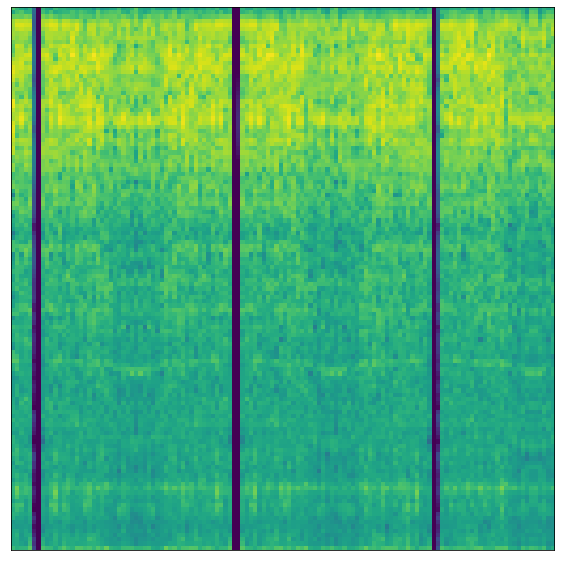

In [45]:
# class_names = ['bulk', 'cat', 'crossed']
plt.figure(figsize=(10, 10))
# for i in range(25):
# plt.subplot(5, 5)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(out.reshape(128, 128))
# label_index = int(Y_train[i])
# plt.title(class_names[label_index])
plt.show()

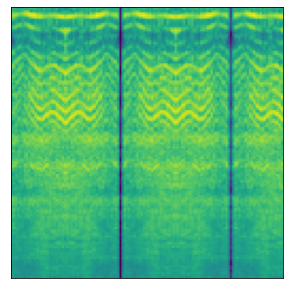

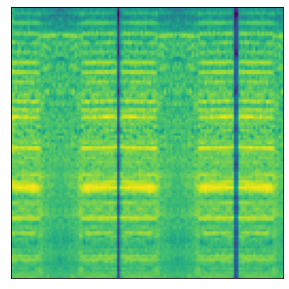

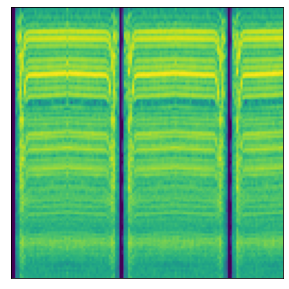

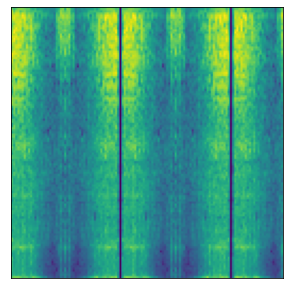

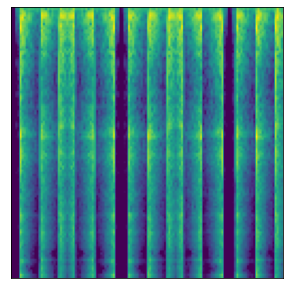

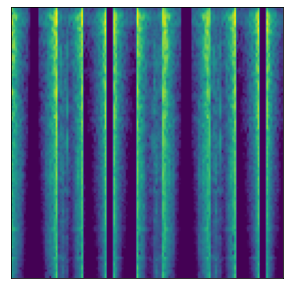

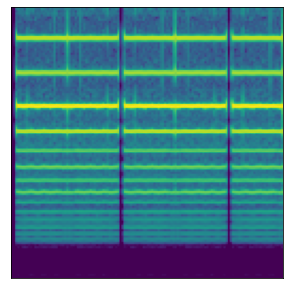

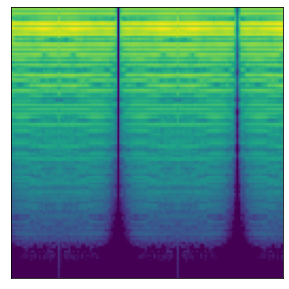

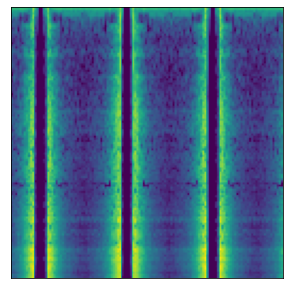

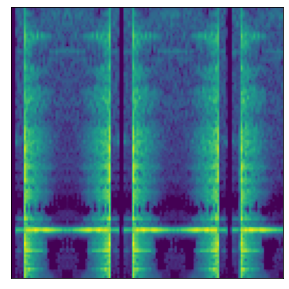

In [46]:
l= ["../input/tools-sound/train/chainsaw/chainsaw-cutting-bush_f1nMLH4_ (mp3cut.net) (1).wav", "../input/tools-sound/train/chainsaw/jg-032316-sfx-table-saw-1 (mp3cut.net) (11).wav", "../input/tools-sound/train/drill/air-drill_fkUmuiVO (mp3cut.net) (1).wav", "../input/tools-sound/train/drill/compressed-air-drill-crushing-asphalt_fkXuyrNu (mp3cut.net) (2).wav", "../input/tools-sound/train/hammer/concrete-hammering_zy0NfSNd (mp3cut.net) (2).wav", "../input/tools-sound/train/hammer/hammering-1_Myph9zVO.wav", "../input/tools-sound/train/horn/boat-horn_Gyqa23Ed (mp3cut.net) (1).wav", "../input/tools-sound/train/horn/ship-horns_MJAnQS4_ (mp3cut.net) (1).wav", "../input/tools-sound/train/sword/jg-032316-sfx-sword-fight (mp3cut.net) (6).wav", "../input/tools-sound/train/sword/small-swords-hits_MJWnXB4d (mp3cut.net) (1) (mp3cut.net) (16).wav"]
for i in l:
    xdb= get_melspectrogram_db(i)
    out= np.array(spec_to_image(xdb), dtype = 'float32')*15
    plt.figure(figsize=(5, 5))
# for i in range(25):
# plt.subplot(5, 5)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(out.reshape(128, 128))
    # label_index = int(Y_train[i])
    # plt.title(class_names[label_index])
    plt.show()

In [47]:
out*15

array([[[ 0.       ,  0.       , 40.588234 , ..., 54.70588  ,
         70.58824  , 52.941177 ],
        [ 0.       ,  0.       , 67.05882  , ..., 75.       ,
         75.       , 67.05882  ],
        [ 0.       ,  0.       , 76.76471  , ..., 83.82353  ,
         77.647064 , 58.235294 ],
        ...,
        [ 0.       ,  0.       , 34.411766 , ..., 23.823528 ,
          0.       ,  0.       ],
        [ 0.       ,  0.       , 12.3529415, ..., 35.29412  ,
          0.       ,  0.       ],
        [ 0.       ,  0.       , 29.117647 , ..., 22.941177 ,
          0.       ,  0.       ]]], dtype=float32)

## Assigning labels 

In [48]:
import os

# Arrange audio path and label
Audio= []
Label= []
parent= "../input/tools-sound/train"
for i in os.listdir(parent):
    son= parent + "/" + i
    for j in os.listdir(son):
        Audio.append(son + "/" + j)
        Label.append(i)
    
    
d= {"Audio": Audio, "Label": Label}

df= pd.DataFrame(d)

In [49]:
df

,Audio,Label
0,../input/tools-sound/train/chainsaw/chainsaw-c...,chainsaw
1,../input/tools-sound/train/chainsaw/jg-032316-...,chainsaw
2,../input/tools-sound/train/chainsaw/jg-032316-...,chainsaw
3,../input/tools-sound/train/chainsaw/jg-032316-...,chainsaw
4,../input/tools-sound/train/chainsaw/jg-032316-...,chainsaw
...,...,...
445,../input/tools-sound/train/drill/pneumatic-dri...,drill
446,../input/tools-sound/train/drill/drill-run-dow...,drill
447,../input/tools-sound/train/drill/jg-032316-sfx...,drill
448,../input/tools-sound/train/drill/jg-032316-sfx...,drill


## Replace Audio file paths with respective image tensors 

In [50]:
for i in range(len(df["Audio"])):
    xdb= get_melspectrogram_db(df["Audio"][i])
    out= np.array(spec_to_image(xdb), dtype = 'float32')*15
    df["Audio"][i]= out.reshape(1, 128, 128)

## Assigning Labels


* Chainsaw- 0
* Drill- 1
* Hammer- 2
* Horn- 3
* Sword- 4

In [51]:
for i in range(len(df["Label"])):
    if df["Label"][i] == "chainsaw":
        df["Label"][i]= 0
        
    elif df["Label"][i] == "drill":
        df["Label"][i]= 1
        
    elif df["Label"][i] == "hammer":
        df["Label"][i]= 2
        
    elif df["Label"][i] == "horn":
        df["Label"][i]= 3
        
    elif df["Label"][i] == "sword":
        df["Label"][i]= 4

In [52]:
df

,Audio,Label
0,"[[[0.0, 1.8235294, 10.529412, 10.588236, 11.0,...",0
1,"[[[6.117647, 6.352941, 7.8235297, 7.764706, 7....",0
2,"[[[9.764707, 9.882353, 10.3529415, 10.941176, ...",0
3,"[[[8.529412, 8.470589, 0.0, 8.705883, 9.0, 10....",0
4,"[[[5.0, 6.0, 7.4117646, 5.882353, 6.0588236, 7...",0
...,...,...
445,"[[[8.470589, 6.882353, 8.647059, 0.0, 0.0, 0.0...",1
446,"[[[10.176471, 7.5294123, 6.8235292, 7.117647, ...",1
447,"[[[12.176471, 4.7058825, 0.0, 8.470589, 10.058...",1
448,"[[[10.235294, 8.588236, 10.823529, 11.3529415,...",1


In [53]:
df= df.sample(frac=1).reset_index(drop=True)
df

,Audio,Label
0,"[[[9.3529415, 3.8235297, 0.0, 8.764707, 10.823...",1
1,"[[[9.941176, 7.2352943, 8.176471, 10.882353, 1...",2
2,"[[[10.529412, 11.176471, 10.764706, 11.235294,...",3
3,"[[[10.294118, 9.235294, 8.294118, 8.058824, 7....",0
4,"[[[8.941176, 6.529412, 8.3529415, 8.470589, 9....",2
...,...,...
445,"[[[4.3529415, 6.0, 7.117647, 8.529412, 7.41176...",0
446,"[[[4.8823533, 1.4705882, 3.235294, 2.5294118, ...",4
447,"[[[13.0, 10.705883, 10.0, 8.411765, 8.411765, ...",2
448,"[[[3.1764705, 5.470588, 5.2352943, 5.2352943, ...",4


In [54]:
train= df["Audio"]
target= df["Label"]

#Training and Validation Split
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(train, target, test_size=0.20)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.15)

In [55]:
X_train = np.array(X_train.values.tolist(), dtype = 'float32')
Y_train = np.array(Y_train.values.tolist(), dtype = 'float32')
X_test= np.array(X_test.values.tolist(), dtype = 'float32') 
Y_test= np.array(Y_test.values.tolist(), dtype = 'float32')
X_val = np.array(X_val.values.tolist(), dtype = 'float32')
Y_val = np.array(Y_val.values.tolist(), dtype = 'float32')

In [56]:
# create features and targets for train set
torch_X_train = torch.from_numpy(X_train).float()
torch_y_train = torch.from_numpy(Y_train).type(torch.LongTensor)# data type is float

# create feature and targets tensor for val set.
torch_X_val = torch.from_numpy(X_val).float()
torch_y_val = torch.from_numpy(Y_val).type(torch.LongTensor) # data type is float

# create features and targets for test set
torch_X_test = torch.from_numpy(X_test).float()
torch_y_test = torch.from_numpy(Y_test).type(torch.LongTensor)# data type is float

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
val = torch.utils.data.TensorDataset(torch_X_val,torch_y_val)
test = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)

In [57]:
batch_size = 100

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size, shuffle = False)
val_loader = torch.utils.data.DataLoader(val, batch_size, shuffle = True)

In [58]:
torch_X_train.shape

torch.Size([306, 1, 128, 128])

# CNN

    Operation                 Output Shape
    Identity function         torch.Size([1, 1, 128, 128])
    Convolution (5 x 5)     torch.Size([1, 6, 124, 124])
    Max pooling (2 x 2)     torch.Size([1, 6, 62, 62])
    Convolution (5 x 5)     torch.Size([1, 12, 58, 58])
    Max pooling (2 x 2)     torch.Size([1, 12, 29, 29]) (The required is 12*12)
    Flatten (reshape)         torch.Size([1, 192])
    Linear transformation     torch.Size([1, 120])
    Linear transformation     torch.Size([1, 60])
    Linear transformation     torch.Size([1, 10])

In [59]:
# Forming CNN with hidden layers

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=11, kernel_size=5) # Convolution layer 1
        self.conv2 = nn.Conv2d(in_channels=11, out_channels=27, kernel_size=5) # Convolution layer 2
        
        self.fc1 = nn.Linear(in_features=27 * 29 * 29, out_features=100) # Linear layer 1 [Linear layer also called Fully Cnnected Layer]
        self.out = nn.Linear(in_features=100, out_features=5) # Linear layer 2 (output layer)
        
    def forward(self, t):
        # input layer
        t=t
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        t = t.reshape(-1, 27 * 29 * 29)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) output layer
        t = self.out(t)
        
        return t

In [60]:
def get_num_correct(preds, labels):
    return preds.argmax(dim= 1).eq(labels).sum().item()

In [61]:
network= Network()
network

Network(
  (conv1): Conv2d(1, 11, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(11, 27, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=22707, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=5, bias=True)
)

# Train and val

In [67]:
optimizer = optim.Adam(network.parameters(), lr=0.001)

valid_loss_min = np.Inf

for epoch in range(50):
    
    train_loss = 0
    train_correct = 0
    
    val_loss = 0
    val_correct = 0

    #####TRAIN DATA SET#####
    
    for batch in train_loader: # Get Batch
  
        images, labels = batch
        preds = network(images) # Pass Batch
        loss = nn.CrossEntropyLoss()(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        train_loss += loss.item()
        train_correct += get_num_correct(preds, labels)
        

        
    #####Validation DATA SET#####

    for batch in val_loader: # Get Batch

        images, labels = batch
        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

#         optimizer.zero_grad()
#         loss.backward() # Calculate Gradients
#         optimizer.step() # Update Weights

        val_loss += loss.item()
        val_correct += get_num_correct(preds, labels)
        
    print("Epoch", epoch, " ;Total Train correct:", train_correct, " ;Train loss:", train_loss)
    print("Total Validation correct:", val_correct ," ;Validation Loss:", val_loss)
    
    
    # save model if validation loss has decreased
    if val_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        val_loss))
        checkpoint = {'model': network,
              'state_dict': network.state_dict(),
              'optimizer' : optimizer.state_dict()}

        torch.save(checkpoint, 'checkpoint.pth')
        valid_loss_min = val_loss
        
    print('\n')

Epoch 0  ;Total Train correct: 237  ;Train loss: 3.629426509141922
Total Validation correct: 57  ;Validation Loss: 2.680126667022705
Validation loss decreased (inf --> 2.680127).  Saving model ...


Epoch 1  ;Total Train correct: 257  ;Train loss: 2.234152242541313
Total Validation correct: 73  ;Validation Loss: 0.7335432171821594
Validation loss decreased (2.680127 --> 0.733543).  Saving model ...


Epoch 2  ;Total Train correct: 279  ;Train loss: 1.9845208525657654
Total Validation correct: 65  ;Validation Loss: 1.2956057786941528


Epoch 3  ;Total Train correct: 274  ;Train loss: 2.219180107116699
Total Validation correct: 60  ;Validation Loss: 1.34952712059021


Epoch 4  ;Total Train correct: 273  ;Train loss: 1.6604026705026627
Total Validation correct: 63  ;Validation Loss: 0.8724455237388611


Epoch 5  ;Total Train correct: 279  ;Train loss: 0.9633590131998062
Total Validation correct: 68  ;Validation Loss: 0.7252522706985474
Validation loss decreased (0.733543 --> 0.725252).  S

# Loading the best MODEL

In [68]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    for parameter in model.parameters():
        parameter.requires_grad = False
    
    model.eval()
    
    return model

In [69]:
network_best = load_checkpoint('checkpoint.pth')
network_best= network_best
print(network_best)

Network(
  (conv1): Conv2d(1, 11, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(11, 27, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=22707, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=5, bias=True)
)


In [70]:
accuracy_train= (train_correct/len(train))*100
print('Train Accuracy=' + str(accuracy_train) + '%')

Train Accuracy=100.0%


In [71]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

network_best.eval() # prep model for evaluation

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = network_best(data)
    # calculate the loss
    loss = F.cross_entropy(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    print(pred)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(val_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %.6f%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        continue

print('\nTest Accuracy (Overall): %.6f%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

tensor([1, 0, 2, 0, 0, 1, 4, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 3, 3, 0, 1, 4, 4, 4, 2,
        0, 1, 2, 1, 4, 0])
Test Loss: 0.217717

Test Accuracy of     0: 93.333333% (14/15)
Test Accuracy of     1: 95.454545% (21/22)
Test Accuracy of     2: 100.000000% ( 7/ 7)
Test Accuracy of     3: 66.666667% ( 2/ 3)
Test Accuracy of     4: 71.428571% ( 5/ 7)

Test Accuracy (Overall): 90.740741% (49/54)
